In [1]:
import starbgone
from io import BytesIO
from urllib.request import urlopen
import numpy as np

In [12]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
xp = np
decomposer = starbgone.DowndateSVDDecomposer
solver = starbgone.generic_svd

data_url = 'https://github.com/carlgogo/VIP_extras/raw/master/datasets/naco_betapic_preproc.npz'
data = np.load(BytesIO(urlopen(data_url).read()))
cube = xp.asarray(data['cube'])
good_pix_mask = np.ones_like(cube[0], dtype=bool)
image_vecs, xx, yy = starbgone.unwrap_cube(cube, good_pix_mask)
image_vecs_meansub = starbgone.mean_subtract_vecs(image_vecs)

In [4]:
n_modes = 30

In [5]:
dd_starlight_subtracted = starbgone.klip_to_modes(
    image_vecs_meansub,
    starbgone.DowndateSVDDecomposer,
    n_modes,
    solver=starbgone.generic_svd,
    exclude_nearest=0
)

dd_outcube = starbgone.wrap_matrix(dd_starlight_subtracted, cube.shape, xx, yy)
dd_final_image = starbgone.quick_derotate(dd_outcube, data['angles'])

In [6]:
cov_starlight_subtracted = starbgone.klip_to_modes(
    image_vecs_meansub,
    starbgone.CovarianceDecomposition,
    n_modes,
    solver=starbgone.generic_eigh,
    exclude_nearest=0
)

cov_outcube = starbgone.wrap_matrix(cov_starlight_subtracted, cube.shape, xx, yy)
cov_final_image = starbgone.quick_derotate(cov_outcube, data['angles'])

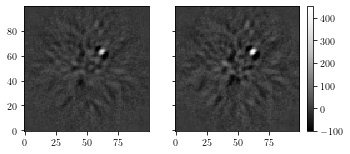

In [47]:
scale = 0.9
fig, (cov_ax, dd_ax) = plt.subplots(figsize=(scale*5.75,scale*2.5), ncols=2, sharey=True)
cov_ax.imshow(cov_final_image, vmin=-100, vmax=450)
im = dd_ax.imshow(dd_final_image, vmin=-100, vmax=450)
plt.colorbar(im)
plt.tight_layout()
plt.savefig('../figures/side_by_side.pdf')